## Aplicaciones de Machine Learning en Economía 
Primer Semestre 2024

Instituto de Economía
Pontificia Universidad Católica de Chile
# Proyecto Final
# Experiencias de Compra en E-Commerce: Métodos de Machine Learning para predecir el nivel de satisfacción de compras en línea
- Autores:
    - Matilde Cerda Ruiz  [<mgcerdar@uc.cl>]
    - Axel Canales Garcia  [<aocanalesg@uc.cl>]
    
- Fecha: Lunes 1 de julio del 2024

## Descripción del proyecto
Breve descripción de proyecto:
- Contexto área del conocimiento: 
- Pregunta de investigación:  ¿Es posible para las empresas estimar la calificación que un cliente probablemente otorgará en su próxima reseña de pedido antes de que esta sea enviada? 
- Fuente de información principal: Brazilian E-Commerce Public Dataset by Olist 
## Contenido
1. [Pre-procesamiento](#seccion1)
2. [Análisis Exploratorio de Datos (EDA](#seccion2)
3. [Feature Engineering](#seccion3)
4. [Entrenamiento](#seccion4)
5. [Evaluación](#seccion5)

## 1. Pre-procesamiento 
Incluir en esta sección:
- Importación de librerías principales
- Carga del data frame
- Integración con otros sets de datos (si aplica)
- Descripción inicial de las columnas:
    - tipo de datos
    - evaluar presencia de missings y outliers

In [31]:
# Importacion de librerias principales
!pip install gdown >nul 2>&1
import gdown
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter




from IPython.core.display    import HTML
from IPython.display         import Image

from scipy                   import stats    as ss
from sklearn                 import metrics  as m

from sklearn.impute          import SimpleImputer
from sklearn.preprocessing   import StandardScaler, OneHotEncoder
from sklearn.compose         import ColumnTransformer, make_column_transformer, make_column_selector
from imblearn.over_sampling  import SMOTE
from imblearn.pipeline       import Pipeline


from sklearn.linear_model    import LogisticRegression
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier
from xgboost                 import XGBClassifier
from sklearn.svm             import SVC


from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.metrics         import accuracy_score, roc_curve, confusion_matrix, classification_report

warnings.filterwarnings("ignore") #Comando para que no haya warnings

ModuleNotFoundError: No module named 'xgboost'

In [2]:
## Se cargan los archivos csv 
# Lista de nombres de archivos
file_names = ['product_category_name_translation.csv',
              'olist_sellers_dataset.csv',
              'olist_products_dataset.csv',
              'olist_orders_dataset.csv',
              'olist_order_reviews_dataset.csv',
              'olist_order_payments_dataset.csv',
              'olist_order_items_dataset.csv',
              'olist_geolocation_dataset.csv',
              'olist_customers_dataset.csv']

# Lista de IDs de archivos en Google Drive
file_ids = ['1BfYQ4z79RTijJhZCCesQyFmgQsxmLpfF',
            '1o14WF3gQ8OOfpL-gOPYmaebb9mugRj8O',
            '1BTdT9s3I7I9NS8_DyLBzw9rT1Q39nHQd',
            '1hJl-5zHDqhacnyo_9Q-aCR9gqLydTZrC',
            '1KjO6AX0FfealcC8aE9_nkyLbZJmGDnvS',
            '1rKIyBxrKIeLncQ32EusKEWnN5pcEz8MY',
            '1RqhR5o7T_XF8IcnLMljUsi_DQ4Zm4XXK',
            '1GI-xHKTEmT4EJJzVvm1Xfbrz8paf3s3a',
            '1D_cArjIYJA02LQgkTO1_lnwlZj7pCljq']

# Se crea el diccionario donde se guardaran los dataframe
dataframes = {}
for file_name, file_id in zip(file_names, file_ids):
    output = f'{file_name}'
    gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)
    dataframes[file_name] = pd.read_csv(output)

# Mostrar las primeras filas de cada DataFrame
for file_name, df in dataframes.items():
    print(f'Data from file {file_name}:')
    print(df.head())

Downloading...
From: https://drive.google.com/uc?id=1BfYQ4z79RTijJhZCCesQyFmgQsxmLpfF
To: C:\Users\Axel Canales\product_category_name_translation.csv
100%|██████████| 2.61k/2.61k [00:00<00:00, 2.62MB/s]
Downloading...
From: https://drive.google.com/uc?id=1o14WF3gQ8OOfpL-gOPYmaebb9mugRj8O
To: C:\Users\Axel Canales\olist_sellers_dataset.csv
100%|██████████| 175k/175k [00:00<00:00, 11.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BTdT9s3I7I9NS8_DyLBzw9rT1Q39nHQd
To: C:\Users\Axel Canales\olist_products_dataset.csv
100%|██████████| 2.38M/2.38M [00:00<00:00, 9.72MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hJl-5zHDqhacnyo_9Q-aCR9gqLydTZrC
To: C:\Users\Axel Canales\olist_orders_dataset.csv
100%|██████████| 17.7M/17.7M [00:02<00:00, 8.07MB/s]
Downloading...
From: https://drive.google.com/uc?id=1KjO6AX0FfealcC8aE9_nkyLbZJmGDnvS
To: C:\Users\Axel Canales\olist_order_reviews_dataset.csv
100%|██████████| 14.5M/14.5M [00:02<00:00, 6.07MB/s]
Downloading...
From: https://

Data from file product_category_name_translation.csv:
    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor
Data from file olist_sellers_dataset.csv:
                          seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  bragan

In [3]:
# Crear un nuevo diccionario con los nombres de dataset sin el prefijo olist y sin .csv
dataframes = {name.replace('olist_', '').replace('.csv', ''): df for name, df in dataframes.items()}

## Se eliminan todas aquellas columnas que terminen en zip_code_prefix salvo las del dataset geolocation y seller para disminuir redundancia y uso de memoria
for dataset_name, dataset_df in dataframes.items():
    # Excluir los DataFrames 'olist_geolocation_dataset.csv' y 'olist_sellers_dataset.csv'
    if dataset_name not in ['geolocation_dataset', 'sellers_dataset', 'customers_dataset']:
        # Filtrar las columnas que no terminan en "zip_code_prefix"
        filtered_columns = [col for col in dataset_df.columns if not col.endswith('zip_code_prefix')]
        # Almacenar solo las columnas filtradas en el DataFrame
        dataframes[dataset_name] = dataset_df[filtered_columns]

# Renombrar las columnas 'geolocation_zip_code_prefix' y 'seller_zip_code_prefix' a 'zip_code_prefix' para utilizarlas como key
dataframes['geolocation_dataset'].rename(columns={'geolocation_zip_code_prefix': 'zip_code_prefix'}, inplace=True)
dataframes['sellers_dataset'].rename(columns={'seller_zip_code_prefix': 'zip_code_prefix'}, inplace=True)

In [4]:
# Definir la función para combinar datasets
def merge_datasets(dataframes):
    # Combinar orders_dataset y customers_dataset usando customer_id primero por ser tablas principales
    merged = pd.merge(dataframes['customers_dataset'], dataframes['orders_dataset'], on='customer_id', how='left')
    merged = pd.merge(merged, dataframes['order_items_dataset'], on='order_id', how='left')
    merged = pd.merge(merged, dataframes['sellers_dataset'], on='seller_id', how='left')
    merged = pd.merge(merged, dataframes['products_dataset'], on='product_id', how='left')
    merged = pd.merge(merged, dataframes['order_payments_dataset'], on='order_id', how='left')
    merged = pd.merge(merged, dataframes['order_reviews_dataset'], on='order_id', how='left')
    merged = pd.merge(merged, dataframes['product_category_name_translation'], on='product_category_name', how='left')
    merged = pd.merge(merged, dataframes['geolocation_dataset'], on='zip_code_prefix', how='left')
    return merged

# Fusionar los datasets cargados
df = merge_datasets(dataframes)
# Se elimina una columna que tiene descripcion del producto en portugues
df = df.drop(columns=['product_category_name'])
#Se renombra la columna que contiene la categoria de producto en ingles
df.rename(columns={'product_category_name_english': 'product_category_name'}, inplace=True)

# Mostrar las primeras filas del dataframe fusionado
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17094341 entries, 0 to 17094340
Data columns (total 43 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   customer_id                    object 
 1   customer_unique_id             object 
 2   customer_zip_code_prefix       int64  
 3   customer_city                  object 
 4   customer_state                 object 
 5   order_id                       object 
 6   order_status                   object 
 7   order_purchase_timestamp       object 
 8   order_approved_at              object 
 9   order_delivered_carrier_date   object 
 10  order_delivered_customer_date  object 
 11  order_estimated_delivery_date  object 
 12  order_item_id                  float64
 13  product_id                     object 
 14  seller_id                      object 
 15  shipping_limit_date            object 
 16  price                          float64
 17  freight_value                  float64
 18  

In [5]:
# Chequear si existen duplicados
print("Observaciones duplicadas antes de ser eliminadas:")
print(df.duplicated().sum())
#Eliminar duplicados
df = df.drop_duplicates()
# Verificar nuevamente si existen duplicados después de la eliminación
print("Observaciones duplicadas después de ser eliminadas:")
print(df.duplicated().sum())

Observaciones duplicadas antes de ser eliminadas:
4208445
Observaciones duplicadas después de ser eliminadas:
0


In [6]:
# Contar los valores NaN en cada columna del DataFrame
print("Observaciones nulas antes de ser eliminadas:")
print(df.isna().sum())
#Eliminar los NaN
df.dropna(inplace=True)
print("Observaciones nulas despues de ser eliminadas:")
print(df.isna().sum())

Observaciones nulas antes de ser eliminadas:
customer_id                             0
customer_unique_id                      0
customer_zip_code_prefix                0
customer_city                           0
customer_state                          0
order_id                                0
order_status                            0
order_purchase_timestamp                0
order_approved_at                    1866
order_delivered_carrier_date       128467
order_delivered_customer_date      271026
order_estimated_delivery_date           0
order_item_id                         833
product_id                            833
seller_id                             833
shipping_limit_date                   833
price                                 833
freight_value                         833
zip_code_prefix                       833
seller_city                           833
seller_state                          833
product_name_lenght                185163
product_description_lenght     

In [7]:
# Convertir las columnas de fecha al formato datetime
date_columns = [
    'order_purchase_timestamp',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date']

if df is not None and all(col in df.columns for col in date_columns):
    for col in date_columns:
        if df[col].notna().any():  # Verifica si hay datos no nulos en la columna
            df[col] = pd.to_datetime(df[col], errors='coerce')

## 2. Feature Engineering <a name="seccion3"></a>
Incluir en esta sección:
- Transformaciones necesarias tanto de atributos como target para su ingesta por parte de algoritmos ML:
    - Estandarización y escalado
    - Bucketization
    - One-hot encoding
    - Técnicas de reducción de dimensionalidadoutliers

In [8]:
## Creacion de la variable dependiente ##
df['satisfaction'] = df['review_score'].apply(lambda x: 1 if x >= 4 else 0)

## Creacion de variables independientes ##
# Crear una nueva columna con la cantidad de caracteres en 'review_comment_message'
df['review_message_length'] = df['review_comment_message'].str.len().fillna(0).astype(int)

# Crear una nueva columna con el valor 1 si dejaron reseña, de lo contrario 0
df['message_exists'] = np.where(df['review_comment_message'].notna() & (df['review_comment_message'] != ''), 1, 0)

# Calcular el número de días en retraso de una entrega
df['delivery_delay_days'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days

# Definir una variable 'late_delivery'
df['late_delivery'] = np.where(df['delivery_delay_days'] > 0, 1, 0)

# Calcular el número de días que el vendedor retuvo la orden desde que se generó la compra
df['seller_days'] = (df['order_delivered_carrier_date'] - df['order_purchase_timestamp']).dt.days

# Calcular el número de días que el equipo de entrega tardó en entregar el paquete desde que lo recibió del vendedor
df['logistic_days'] = (df['order_delivered_customer_date'] - df['order_delivered_carrier_date']).dt.days

# Calcular el volumen del producto en m3 si las columnas existen
df['product_volume_m3'] = (df['product_length_cm'] * df['product_width_cm'] * df['product_height_cm']) / 1000000


In [9]:
# Crear una nueva columna que indique si el cliente y el vendedor tienen el mismo código postal
df['same_postal'] = (df['customer_zip_code_prefix'] == df['zip_code_prefix']).astype(int)

# Crear el valor total por item (price + value)
df['total_por_producto'] = df['price'] + df['freight_value']

# Agrupar por order_id y sumar order_item_value
grouped_totals = df.groupby('order_id')['total_por_producto'].sum().reset_index()

# Renombrar la columna de suma para clarificar su propósito
grouped_totals.rename(columns={'total_por_producto': 'total_por_orden'}, inplace=True)

# Unir (merge) este DataFrame con el original
df = df.merge(grouped_totals, on='order_id')

In [10]:
# Renombrar la columna order_item_id ya que indica la cantidad de productos por orden
df.rename(columns={'order_item_id': 'cant_prod_orden'}, inplace=True)

In [11]:
# One - hot encoding
df_dummies = pd.get_dummies(df, columns=[
    'payment_type', 
    'seller_city', 
    'seller_state', 
    'product_category_name', 
    'customer_city', 
    'customer_state'
])

In [12]:
# Eliminar variables que ya no necesitaremos
df.drop(columns=['product_length_cm', 'product_height_cm', 'product_width_cm','review_id', 'review_creation_date', 'review_answer_timestamp', 'review_comment_title', 'order_approved_at','customer_zip_code_prefix','zip_code_prefix'], inplace=True)

In [13]:
# Chequear si existen duplicados nuevamente
print("Observaciones duplicadas antes de ser eliminadas:")
print(df.duplicated().sum())
#Eliminar duplicados
df = df.drop_duplicates()
# Verificar nuevamente si existen duplicados después de la eliminación
print("Observaciones duplicadas después de ser eliminadas:")
print(df.duplicated().sum())

Observaciones duplicadas antes de ser eliminadas:
389
Observaciones duplicadas después de ser eliminadas:
0


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1200896 entries, 0 to 1201284
Data columns (total 44 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   customer_id                    1200896 non-null  object        
 1   customer_unique_id             1200896 non-null  object        
 2   customer_city                  1200896 non-null  object        
 3   customer_state                 1200896 non-null  object        
 4   order_id                       1200896 non-null  object        
 5   order_status                   1200896 non-null  object        
 6   order_purchase_timestamp       1200896 non-null  datetime64[ns]
 7   order_delivered_carrier_date   1200896 non-null  datetime64[ns]
 8   order_delivered_customer_date  1200896 non-null  datetime64[ns]
 9   order_estimated_delivery_date  1200896 non-null  datetime64[ns]
 10  cant_prod_orden                1200896 non-null  float64   

## 3. Análisis Exploratorio de Datos <a name="seccion2"></a>
Incluir en esta sección:
- Análisis descriptivo de cada atributo y la variable objetivo
    - Distribución variables contínuas
    - Conteo de presencia de cada estado en variables categóricas
    - Evaluar potencial predictivo de atributos sobre target:
        - Matriz de correlación
        - Distribuciones por clase
- Decisiones de imputación de missings y depuración de outliers

### Estadisticos Descriptivos

In [15]:
num_attributes = df[['payment_sequential', 'payment_installments', 'payment_value', 'price', 'freight_value', 'product_name_lenght', 
                       'product_description_lenght', 'product_photos_qty', 'product_weight_g','satisfaction', 'review_message_length', 'message_exists', 'delivery_delay_days', 'late_delivery', 'seller_days', 'logistic_days', 'product_volume_m3', 'same_postal', 'total_por_orden', 'total_por_producto']]

cat_attributes = df[['order_status', 'order_id', 'cant_prod_orden', 'order_purchase_timestamp', 'order_delivered_customer_date','order_estimated_delivery_date', 
                       'payment_type', 'product_category_name', 'customer_state', 'seller_state', 'review_score']]

#### Atributos numericos 

In [16]:
num_attributes.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_sequential,1200896.0,1.059712,0.428313,1.000000,1.00000,1.00000,1.0000,12.000
payment_installments,1200896.0,3.138709,2.851282,1.000000,1.00000,2.00000,4.0000,20.000
payment_value,1200896.0,194.133353,265.698212,0.050000,69.53000,123.61000,211.2400,7274.880
price,1200896.0,130.433197,203.231930,0.850000,43.99000,79.90000,139.0000,4590.000
freight_value,1200896.0,22.054353,18.165478,0.000000,13.45000,18.30000,23.3500,375.280
product_name_lenght,1200896.0,49.459950,9.758917,8.000000,43.00000,53.00000,57.0000,64.000
product_description_lenght,1200896.0,772.306440,656.831240,4.000000,339.00000,582.00000,971.0000,3985.000
product_photos_qty,1200896.0,2.030792,1.551547,1.000000,1.00000,1.00000,2.0000,17.000
product_weight_g,1200896.0,2089.895083,3741.067917,0.000000,300.00000,700.00000,1700.0000,30000.000
satisfaction,1200896.0,0.684992,0.464519,0.000000,0.00000,1.00000,1.0000,1.000


#### Variables Categoricas

In [17]:
cat_summary = cat_attributes.astype('category').describe().T
cat_summary 

,count,unique,top,freq
order_status,1200896,1,delivered,1200896
order_id,1200896,9419,637617b3ffe9e2f7a2411243829226d0,2604
cant_prod_orden,1200896.0,13.0,1.0,1017169.0
order_purchase_timestamp,1200896,9398,2018-04-17 21:08:59,2604
order_delivered_customer_date,1200896,9385,2018-05-11 17:56:48,2604
order_estimated_delivery_date,1200896,153,2018-05-29 00:00:00,24338
payment_type,1200896,4,credit_card,913437
product_category_name,1200896,66,bed_bath_table,208482
customer_state,1200896,27,SP,532313
seller_state,1200896,18,SP,863263


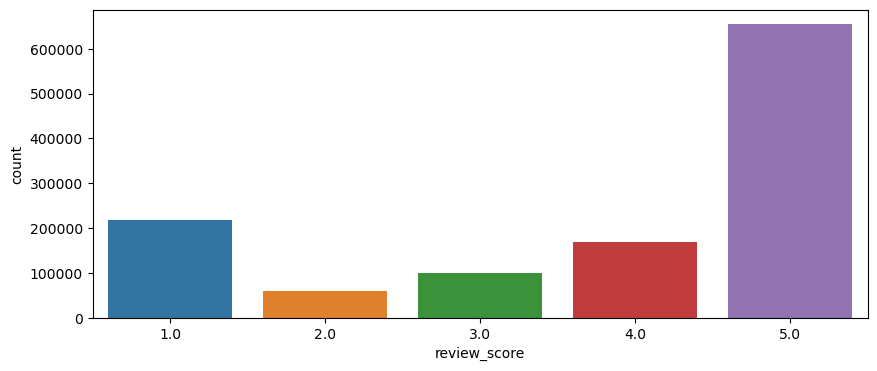

In [18]:
cat_attributes = df[['order_status', 'customer_state', 'seller_state', 'payment_type', 'product_category_name', 'late_delivery', 'review_score']]
## Review score
plt.figure(figsize=(10, 4))
sns.countplot(x='review_score', data=df);

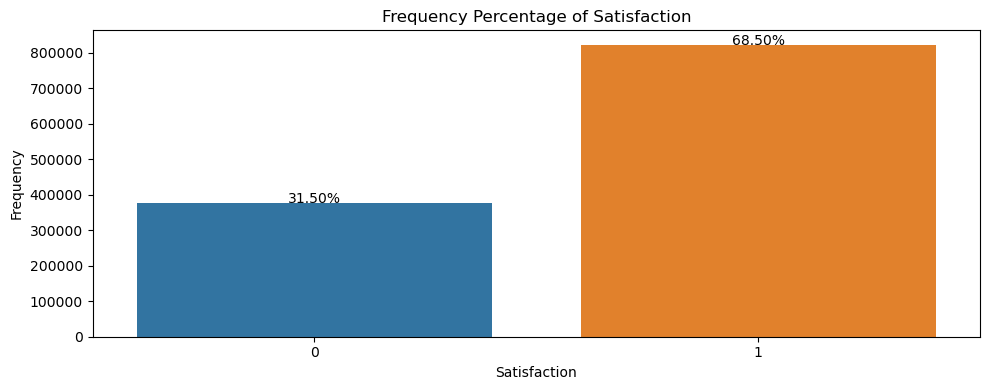

In [19]:
# Calcular los porcentajes
total = len(df)  # Total de filas en el DataFrame
counts = df['satisfaction'].value_counts()  # Conteo de cada categoría de satisfacción
percentages = (counts / total) * 100  # Calcular los porcentajes

# Crear el gráfico
plt.figure(figsize=(10, 4))
ax = sns.countplot(x='satisfaction', data=df)

# Mostrar porcentajes sobre las barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.5, f'{height / total * 100:.2f}%', ha="center", fontsize=10)

# Configuraciones adicionales
plt.xlabel('Satisfaction')
plt.ylabel('Frequency')
plt.title('Frequency Percentage of Satisfaction')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

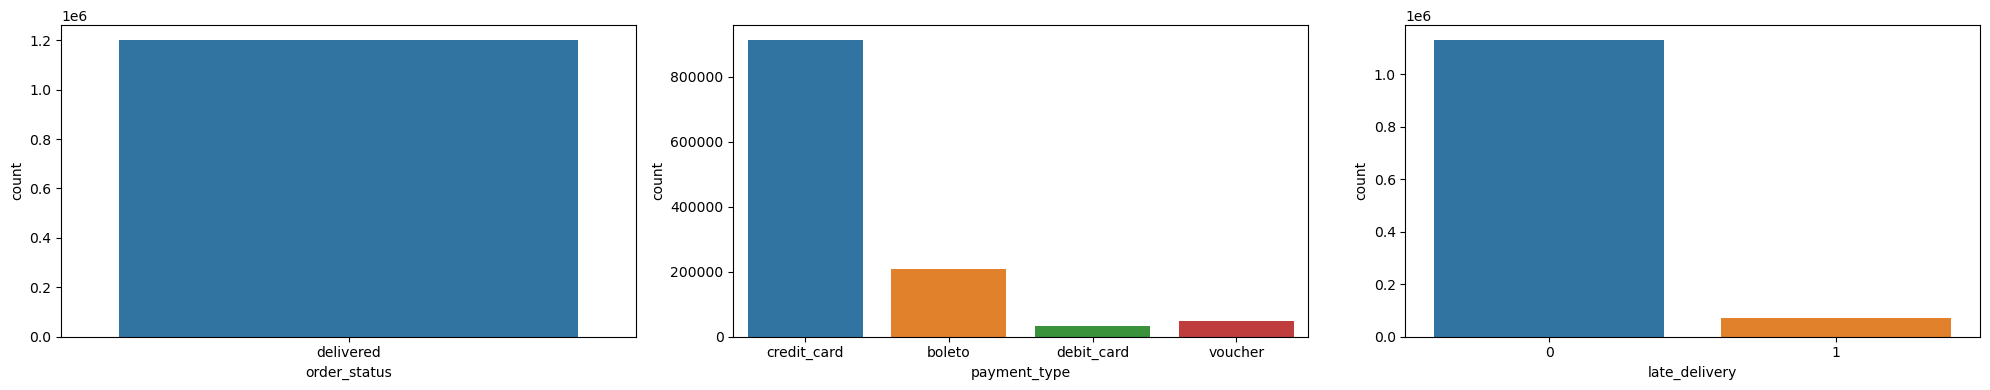

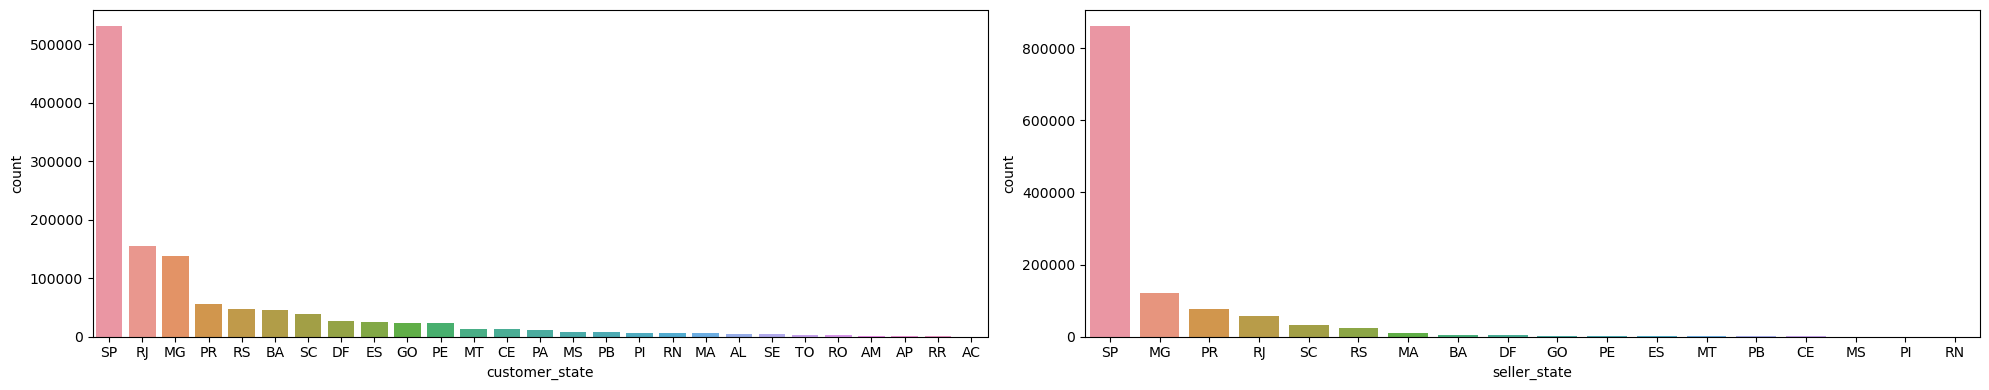

In [20]:
cols = 3
rows = 1 
num_cols = cat_attributes[['order_status', 'payment_type', 'late_delivery']]

fig = plt.figure(figsize= (20, 4))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot( rows, cols, i+1)
    sns.countplot(x=cat_attributes[col], ax=ax)
    
fig.tight_layout()       
plt.show()

cols = 2
rows = 1 
num_cols = cat_attributes[['customer_state', 'seller_state']]

fig = plt.figure(figsize= (20, 4))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot( rows, cols, i+1)
    sns.barplot(x=cat_attributes[col].value_counts().index,
                y=cat_attributes[col].value_counts(), ax=ax)
    
fig.tight_layout()       
plt.show() 

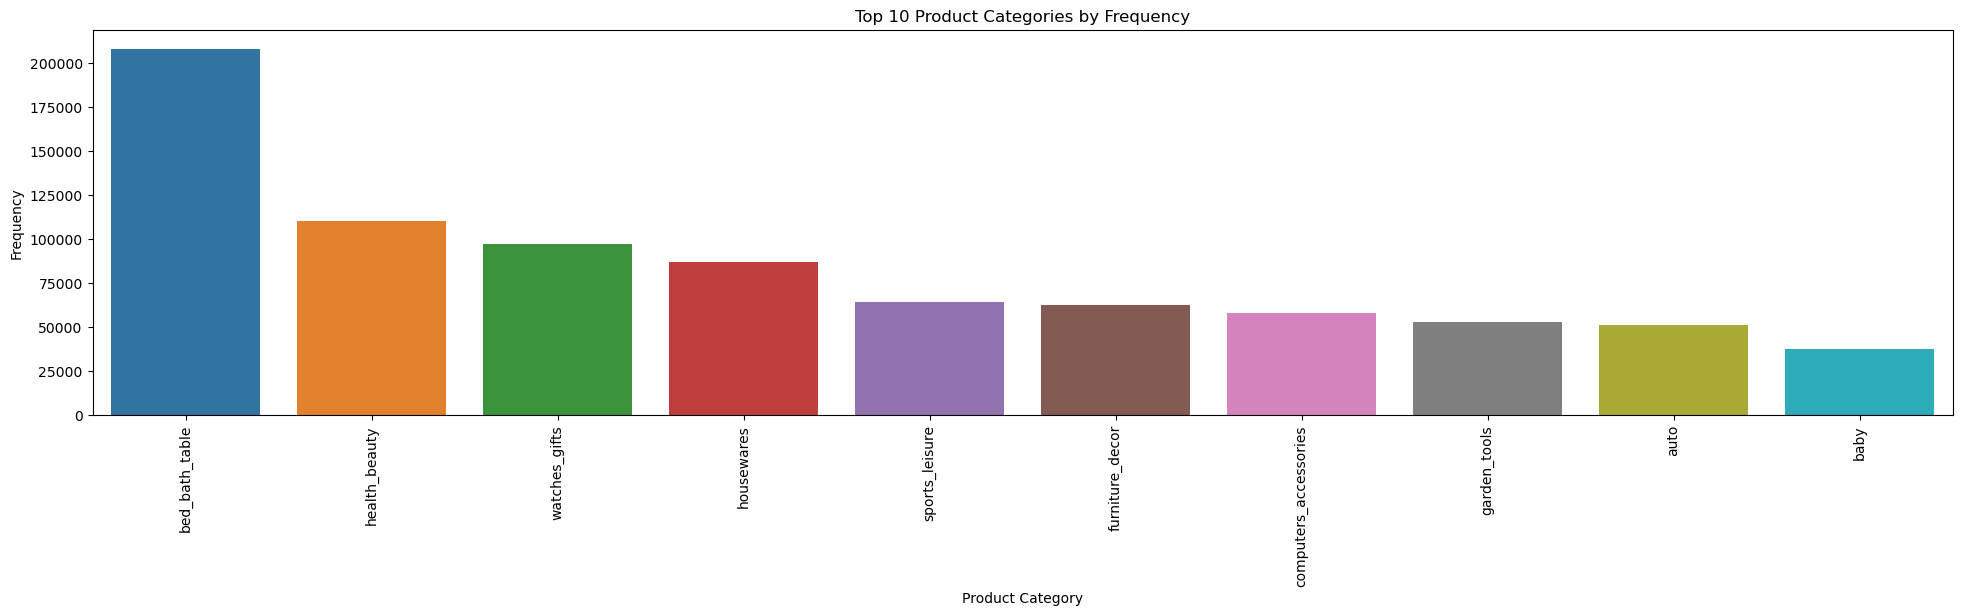

In [21]:
# Contar la frecuencia de cada categoría
category_counts = cat_attributes['product_category_name'].value_counts()

# Filtrar el top 10 en frecuencia
top_10_categories = category_counts.nlargest(10)

# Crear el gráfico
plt.figure(figsize=(24, 5))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values)
plt.xticks(rotation=90)
plt.title('Top 10 Product Categories by Frequency')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='payment_type', ylabel='payment_value'>

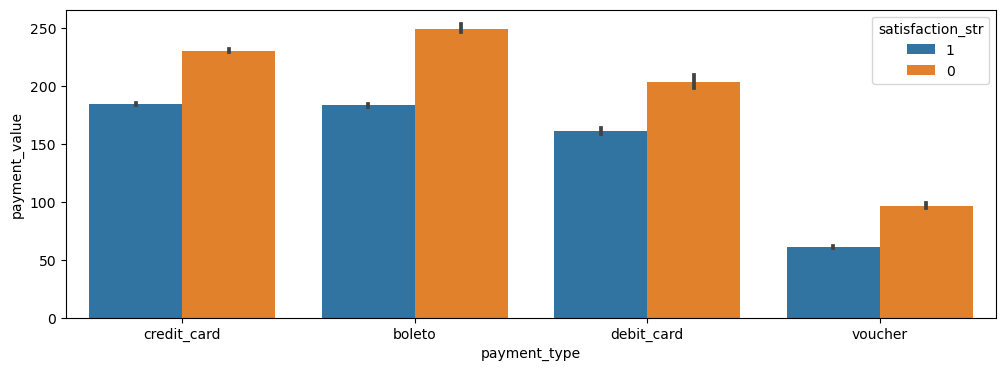

In [22]:
# Convertir 'satisfaction' a tipo string
df['satisfaction_str'] = df['satisfaction'].astype(str)

# Crear el gráfico
plt.figure(figsize=(12, 4))
sns.barplot(x='payment_type', y='payment_value', hue='satisfaction_str', data=df)

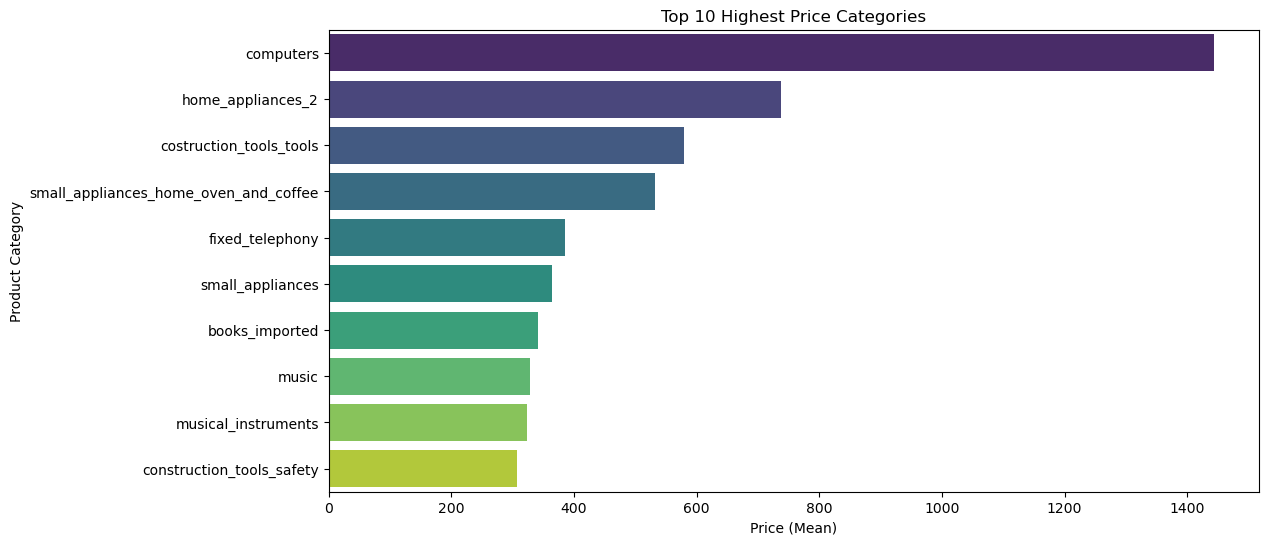

In [23]:
# Obtener las top 10 categorías con el precio promedio más alto
aux = df[['product_category_name', 'price']].groupby('product_category_name').mean().sort_values('price', ascending=False).reset_index()[:10]

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.barplot(y='product_category_name', x='price', data=aux, palette='viridis')

# Agregar título y etiquetas de ejes
plt.title('Top 10 Highest Price Categories')
plt.xlabel('Price (Mean)')
plt.ylabel('Product Category')

plt.show()

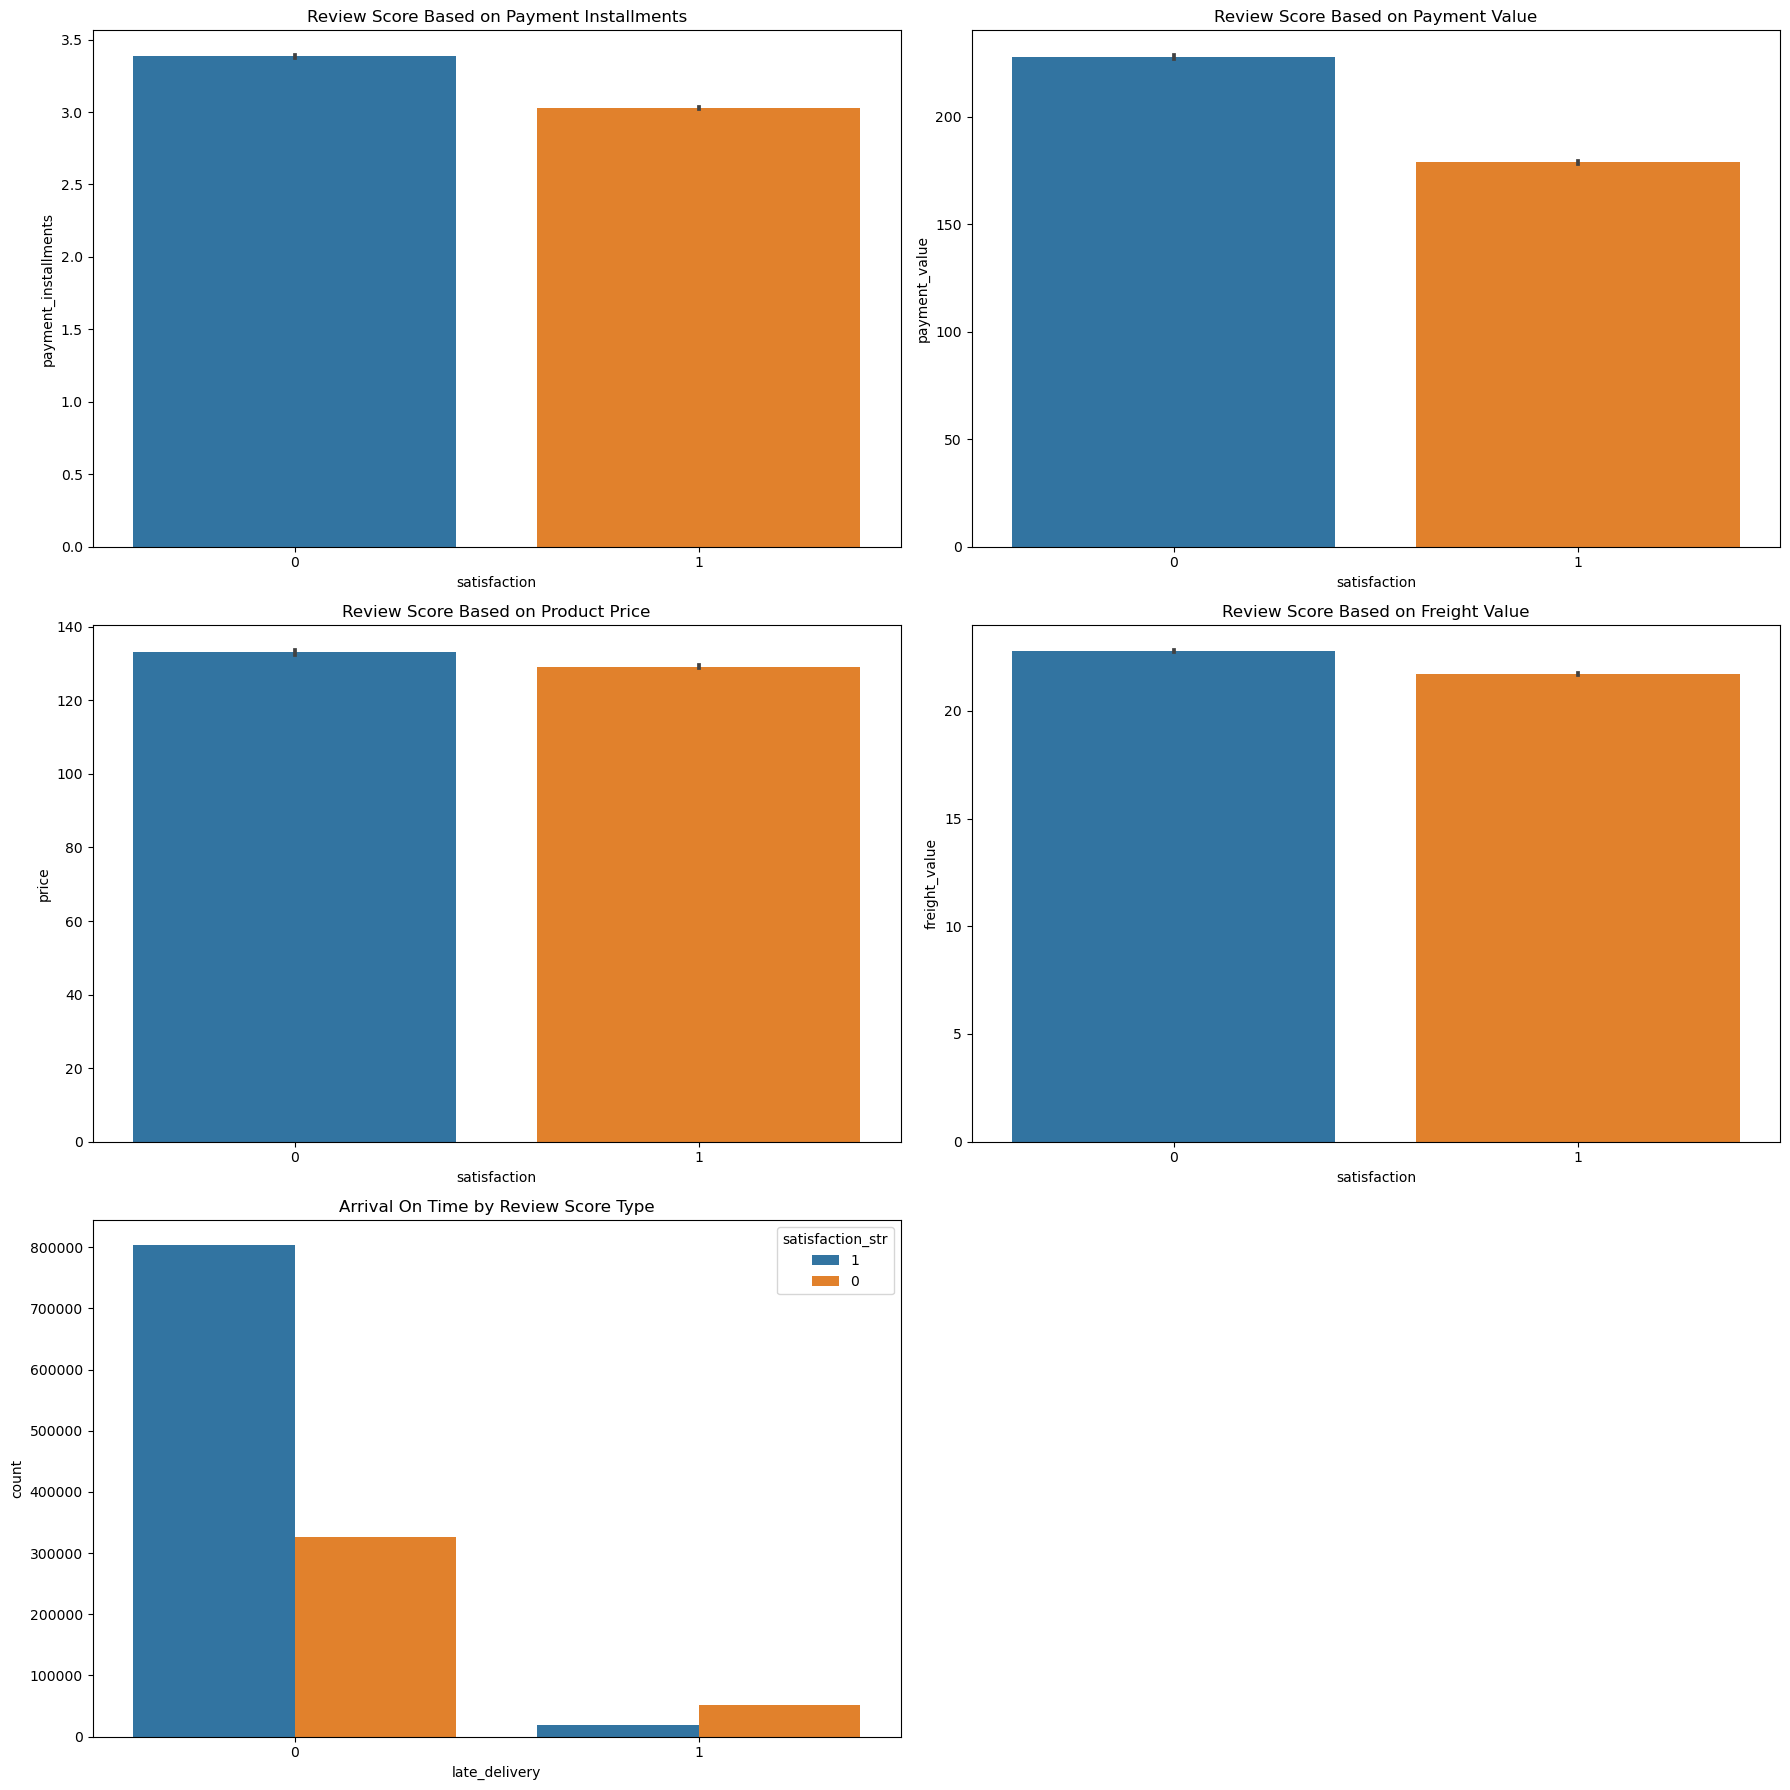

In [24]:
# Crear una figura y ejes utilizando subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

# 1 Review score based on payment installments
sns.barplot(y='payment_installments', x='satisfaction', ax=axes[0, 0], data=df)
axes[0, 0].set_title('Review Score Based on Payment Installments')

# 2 Review score based on payment value
sns.barplot(x='satisfaction', y='payment_value', ax=axes[0, 1], data=df)
axes[0, 1].set_title('Review Score Based on Payment Value')

# 3 Review score based on product price
sns.barplot(x='satisfaction', y='price', ax=axes[1, 0], data=df)
axes[1, 0].set_title('Review Score Based on Product Price')

# 4 Review score based on freight value
sns.barplot(x='satisfaction', y='freight_value', ax=axes[1, 1], data=df)
axes[1, 1].set_title('Review Score Based on Freight Value')

# 5 The number of orders that arrived on time or not by review score type
sns.countplot(x='late_delivery', hue='satisfaction_str', ax=axes[2, 0], data=df)
axes[2, 0].set_title('Arrival On Time by Review Score Type')

# Eliminar el espacio vacío del último gráfico en la última celda
fig.delaxes(axes[2, 1])

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

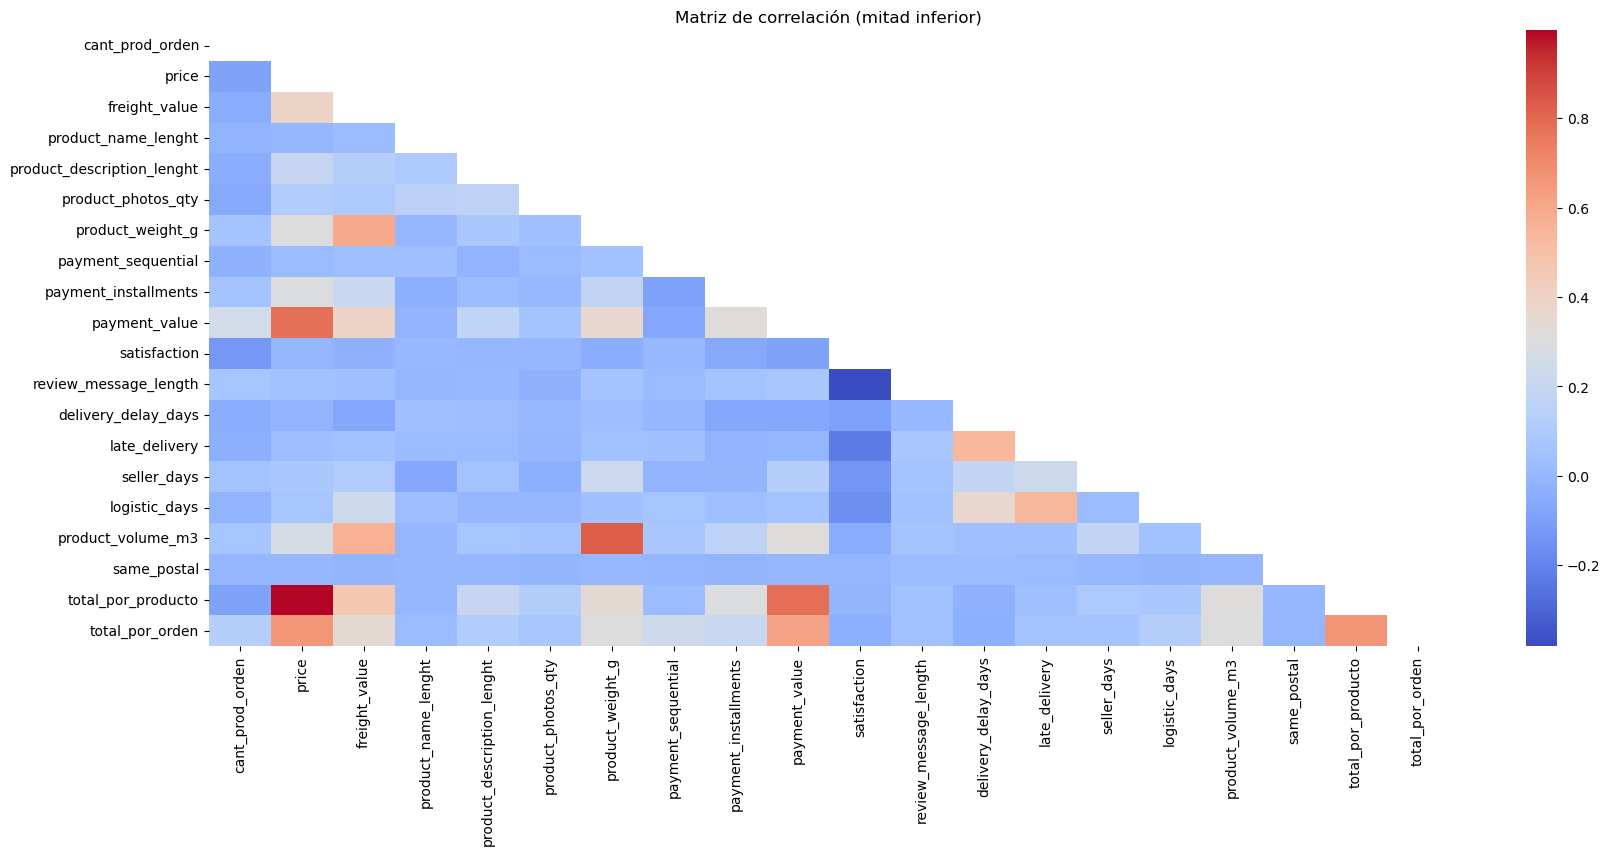

In [25]:
#### Calculo de la matriz de correlacion ####
# Se seleccionan unicamente variables numericas
columnas_numericas = df.select_dtypes(include=[np.number]).drop(['review_score', 'message_exists','geolocation_lat', 'geolocation_lng'], axis=1)

# Calcular la matriz de correlación
correlation_matrix = columnas_numericas.corr()

# Crear una máscara para la mitad inferior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configurar el tamaño del gráfico
plt.figure(figsize=(20, 8))

# Crear el mapa de calor con la máscara y la matriz de correlación
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")

# Configurar título y mostrar el gráfico
plt.title('Matriz de correlación (mitad inferior)')
plt.show()

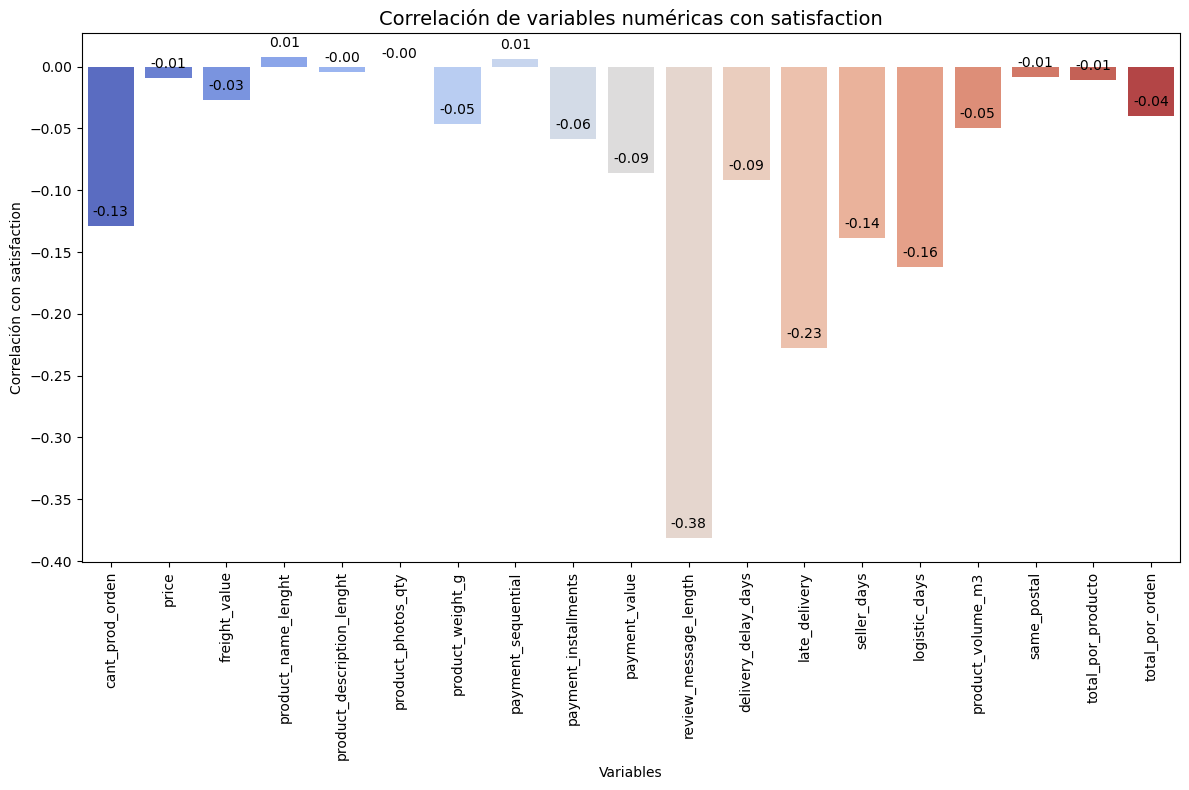

In [26]:
####### Calculo de la matriz de correlacion unicamente con satisfaction ##########
# Calcular la correlación de satisfaction con todas las variables numéricas
correlations_with_satisfaction = columnas_numericas.corr()['satisfaction'].drop(['satisfaction'])

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras para mostrar las correlaciones
ax = sns.barplot(x=correlations_with_satisfaction.index, y=correlations_with_satisfaction.values, palette='coolwarm')

# Configurar etiquetas y título
plt.xlabel('Variables', fontsize=10)
plt.ylabel('Correlación con satisfaction', fontsize=10)
plt.title('Correlación de variables numéricas con satisfaction', fontsize=14)

# Mostrar las correlaciones encima de cada barra
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

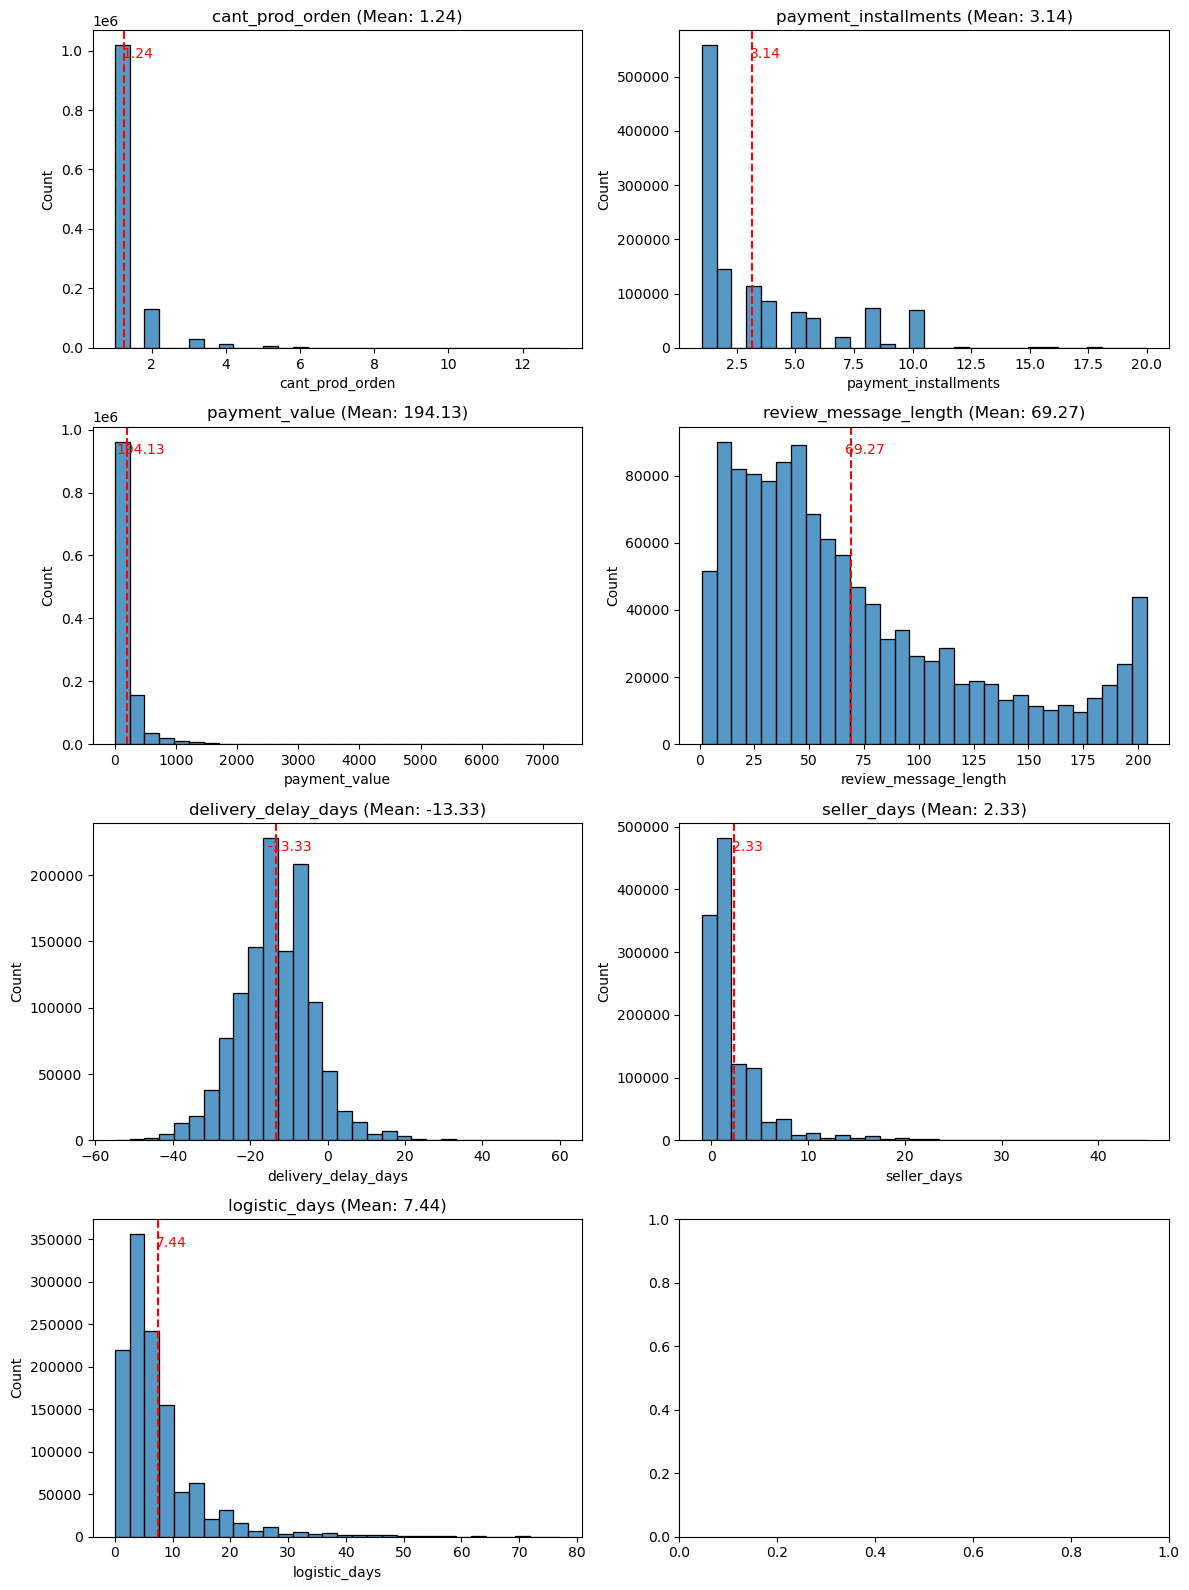

In [27]:
# Filtrar columnas con correlación absoluta >= 0.05
selected_columns = correlations_with_satisfaction[correlations_with_satisfaction.abs() >= 0.05].index.drop(['late_delivery'])

# Crear subplots para los histogramas
n_columns = 2
n_rows = (len(selected_columns) + 1) // n_columns  # Añadir 1 antes de la división para redondear hacia arriba
fig, axs = plt.subplots(n_rows, n_columns, figsize=(12, 4 * n_rows))

# Si sólo hay un subplot, axs no será un array, así que lo convertimos a una lista
if n_rows == 1:
    axs = [axs]

# Dibujar histogramas para cada variable seleccionada
for i, col in enumerate(selected_columns):
    ax = axs[i // n_columns][i % n_columns]  # Selección del subplot
    sns.histplot(df[col], bins=30, kde=False, ax=ax)
    mean_value = df[col].mean()
    ax.axvline(mean_value, color='r', linestyle='--')
    ax.set_title(f'{col} (Mean: {mean_value:.2f})')
    ax.annotate(f'{mean_value:.2f}', xy=(mean_value, ax.get_ylim()[1]), xytext=(10, -20),
                textcoords='offset points', color='r', ha='center')

# Ajustar el diseño
plt.tight_layout()
plt.show()

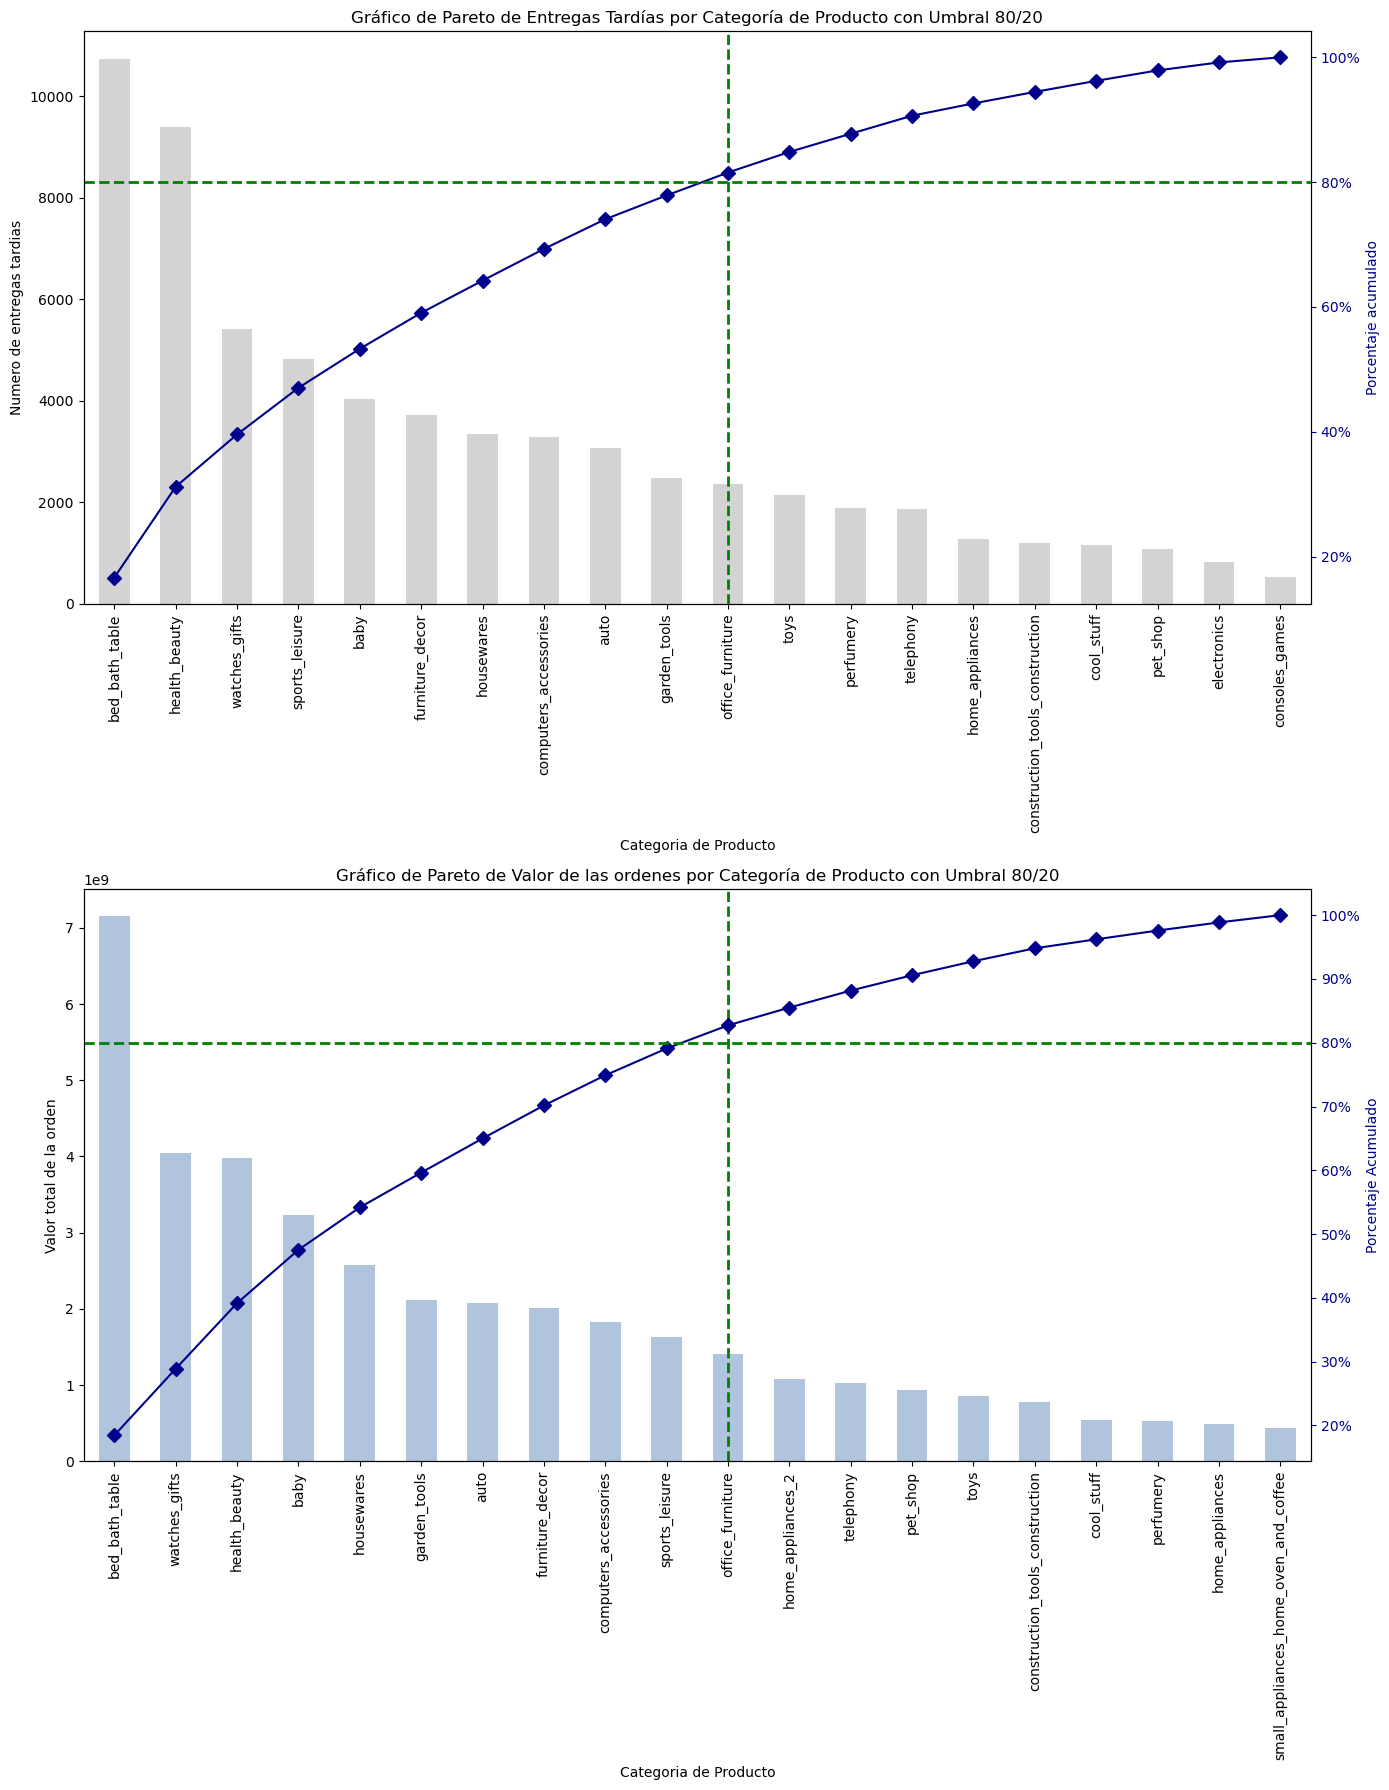

In [28]:
######## Diagrama de Pareto #########
# Para el gráfico de Pareto de entregas tardías por categoría de producto

# Calcular el porcentaje de entregas tardías por categoría
late_deliveries_by_category = df[df['late_delivery'] == 1]['product_category_name'].value_counts().nlargest(20)
total_late_deliveries = late_deliveries_by_category.sum()
late_deliveries_by_category_percent = (late_deliveries_by_category / total_late_deliveries).cumsum() * 100

# Para el gráfico de Pareto del valor total de pedidos por categoría de producto

# Calcular el valor total de pedidos por categoría
order_value_by_category = df.groupby('product_category_name')['total_por_orden'].sum().nlargest(20)
total_order_value = order_value_by_category.sum()
order_value_by_category_percent = (order_value_by_category / total_order_value).cumsum() * 100

# Crear la figura y los subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 18))  # Ajusta el tamaño de la figura si es necesario

# Gráfico de Pareto de entregas tardías por categoría de producto
late_deliveries_by_category.plot(kind='bar', ax=axes[0], color='lightgray')
axes[0].set_ylabel('Numero de entregas tardias', color='black')
axes[0].set_xlabel('Categoria de Producto')
axes[0].tick_params(axis='y', colors='black')
axes[0].set_title('Gráfico de Pareto de Entregas Tardías por Categoría de Producto con Umbral 80/20')

# Crear un eje secundario en el gráfico de entregas tardías
ax1_twin = axes[0].twinx()
ax1_twin.plot(late_deliveries_by_category_percent.index, late_deliveries_by_category_percent.values, color='darkblue', marker='D', ms=7)
ax1_twin.yaxis.set_major_formatter(PercentFormatter())
ax1_twin.set_ylabel('Porcentaje acumulado', color='darkblue')
ax1_twin.tick_params(axis='y', colors='darkblue')

# Añadir líneas para el umbral del 80%
ax1_twin.axhline(80, color='green', linestyle='--', linewidth=2)
category_80_idx = late_deliveries_by_category_percent[late_deliveries_by_category_percent >= 80].index[0]
category_80_position = late_deliveries_by_category.index.get_loc(category_80_idx)
axes[0].axvline(category_80_position, color='green', linestyle='--', linewidth=2)

axes[0].tick_params(axis='x', rotation=90)

# Gráfico de Pareto del valor total de pedidos por categoría de producto
order_value_by_category.plot(kind='bar', ax=axes[1], color='lightsteelblue')
axes[1].set_ylabel('Valor total de la orden', color='black')
axes[1].set_xlabel('Categoria de Producto')
axes[1].tick_params(axis='y', colors='black')
axes[1].set_title('Gráfico de Pareto de Valor de las ordenes por Categoría de Producto con Umbral 80/20')

# Crear un eje secundario en el gráfico de valor total de pedidos
ax2_twin = axes[1].twinx()
ax2_twin.plot(order_value_by_category_percent.index, order_value_by_category_percent.values, color='darkblue', marker='D', ms=7)
ax2_twin.yaxis.set_major_formatter(PercentFormatter())
ax2_twin.set_ylabel('Porcentaje Acumulado', color='darkblue')
ax2_twin.tick_params(axis='y', colors='darkblue')

# Añadir líneas para el umbral del 80%
ax2_twin.axhline(80, color='green', linestyle='--', linewidth=2)
category_80_idx_corrected = order_value_by_category_percent[order_value_by_category_percent >= 80].index[0]
category_80_position_corrected = order_value_by_category.index.get_loc(category_80_idx_corrected)
axes[1].axvline(category_80_position_corrected, color='green', linestyle='--', linewidth=2)

axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

## 4. Entrenamiento <a name="seccion4"></a>
Incluir en esta sección:
- Train/test split
- Balanceo de clases (si aplica)
- Definición de la(s) métrica(s) de perfomance que se utilizará(n)
- Grid search
- Entrenamiento de modelostliers

## Multilayer Perceptron

### Data Preparation

#### Rescaling

In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1200896 entries, 0 to 1201284
Data columns (total 45 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   customer_id                    1200896 non-null  object        
 1   customer_unique_id             1200896 non-null  object        
 2   customer_city                  1200896 non-null  object        
 3   customer_state                 1200896 non-null  object        
 4   order_id                       1200896 non-null  object        
 5   order_status                   1200896 non-null  object        
 6   order_purchase_timestamp       1200896 non-null  datetime64[ns]
 7   order_delivered_carrier_date   1200896 non-null  datetime64[ns]
 8   order_delivered_customer_date  1200896 non-null  datetime64[ns]
 9   order_estimated_delivery_date  1200896 non-null  datetime64[ns]
 10  cant_prod_orden                1200896 non-null  float64   

In [32]:
numeric_df = df.select_dtypes(include=['number'])

num_transformer = Pipeline(steps=[('scaler',  StandardScaler())])

#### Encoding

In [34]:
cat_features = [['customer_state', 'seller_state', 'payment_type', 'product_category_name']]

cat_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                  ('onehot',  OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [36]:
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, numeric_df),
                                               ('cat', cat_transformer, cat_features)])

preprocessor = make_column_transformer((num_transformer, make_column_selector(dtype_include=np.number)), 
                                       (cat_transformer, make_column_selector(dtype_include=object)))

In [37]:
df.head(10)

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,...,message_exists,delivery_delay_days,late_delivery,seller_days,logistic_days,product_volume_m3,same_postal,total_por_producto,total_por_orden,satisfaction_str
0,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,...,1,-6,0,1,10,0.023625,0,252.25,62305.75,1
1,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,...,1,-6,0,1,10,0.023625,0,252.25,62305.75,1
2,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,...,1,-6,0,1,10,0.023625,0,252.25,62305.75,1
3,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,...,1,-6,0,1,10,0.023625,0,252.25,62305.75,1
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,...,1,-6,0,1,10,0.023625,0,252.25,62305.75,1
5,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,...,1,-6,0,1,10,0.023625,0,252.25,62305.75,1
6,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,...,1,-6,0,1,10,0.023625,0,252.25,62305.75,1
7,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,...,1,-6,0,1,10,0.023625,0,252.25,62305.75,1
8,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,...,1,-6,0,1,10,0.023625,0,252.25,62305.75,1
9,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,...,1,-6,0,1,10,0.023625,0,252.25,62305.75,1


#### Separate Target

In [38]:
from sklearn.model_selection import train_test_split
X = df.drop('satisfaction', axis = 1)
y = df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Model

## 5. Evaluación <a name="seccion5"></a>
Incluir en esta sección:
- Métricas de performance de los mejores modelos encontrados a partir del grid search
- Matriz de confusión
- Feature importancetliers